In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/car-price-prediction/car_price_prediction_.csv')
df = df.convert_dtypes()

In [3]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.1,Mustang


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   Int64  
 1   Brand         2500 non-null   string 
 2   Year          2500 non-null   Int64  
 3   Engine Size   2500 non-null   Float64
 4   Fuel Type     2500 non-null   string 
 5   Transmission  2500 non-null   string 
 6   Mileage       2500 non-null   Int64  
 7   Condition     2500 non-null   string 
 8   Price         2500 non-null   Float64
 9   Model         2500 non-null   string 
dtypes: Float64(2), Int64(3), string(5)
memory usage: 207.6 KB


In [5]:
df.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.0,2500.0,2500.0,2500.0,2500.0
mean,1250.5,2011.6268,3.46524,149749.8448,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.0,2000.0,1.0,15.0,5011.27
25%,625.75,2005.0,2.2,71831.5,28908.485
50%,1250.5,2012.0,3.4,149085.0,53485.24
75%,1875.25,2018.0,4.7,225990.5,75838.5325
max,2500.0,2023.0,6.0,299967.0,99982.59


Brand
BMW         54157.114385
Tesla       53475.547471
Mercedes    53191.090085
Toyota      52078.728235
Honda       52050.283949
Audi         51953.42481
Ford        51593.254813
Name: Price, dtype: Float64


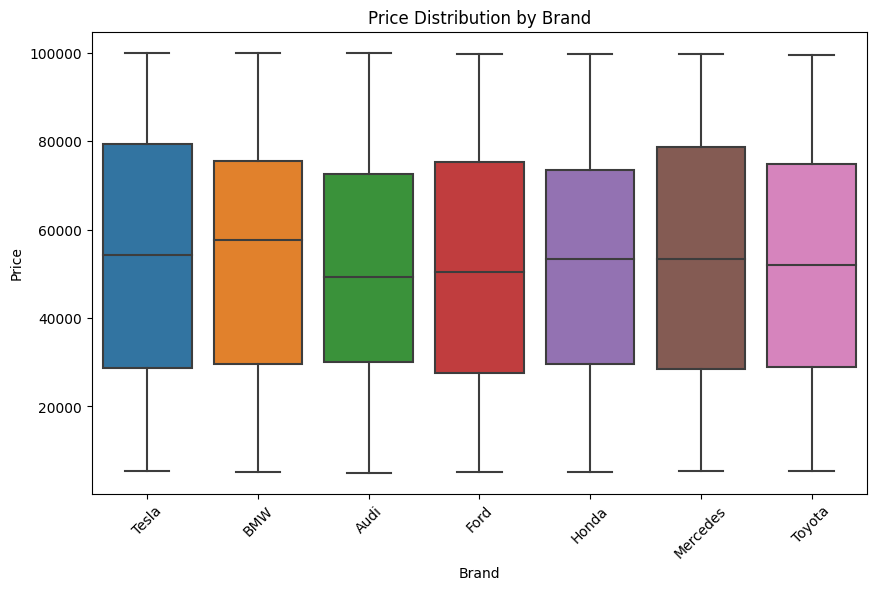

In [6]:
# Average price by brand
brand_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
print(brand_price)

# Boxplot for brand vs. price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.title('Price Distribution by Brand')
plt.xticks(rotation=45)
plt.show()

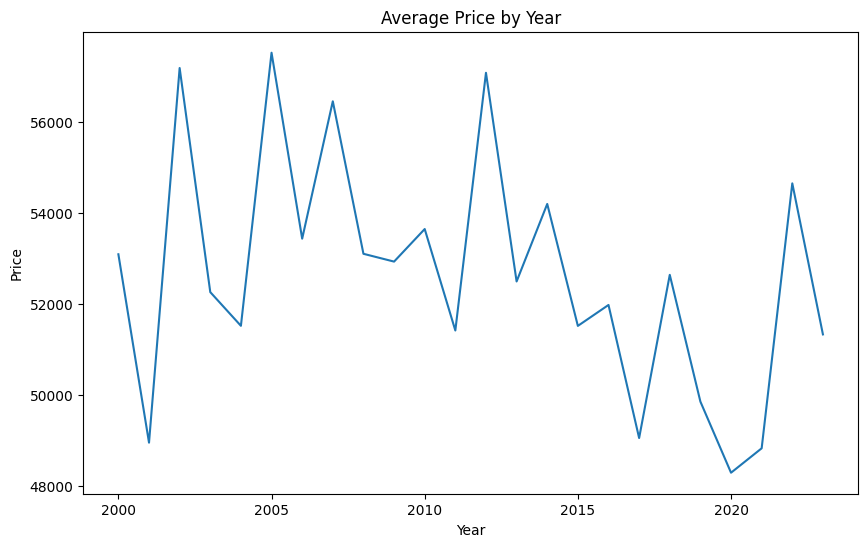

In [9]:
# Average price by year
year_price = df.groupby('Year')['Price'].mean()
plt.figure(figsize=(10, 6))
year_price.plot(kind='line')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

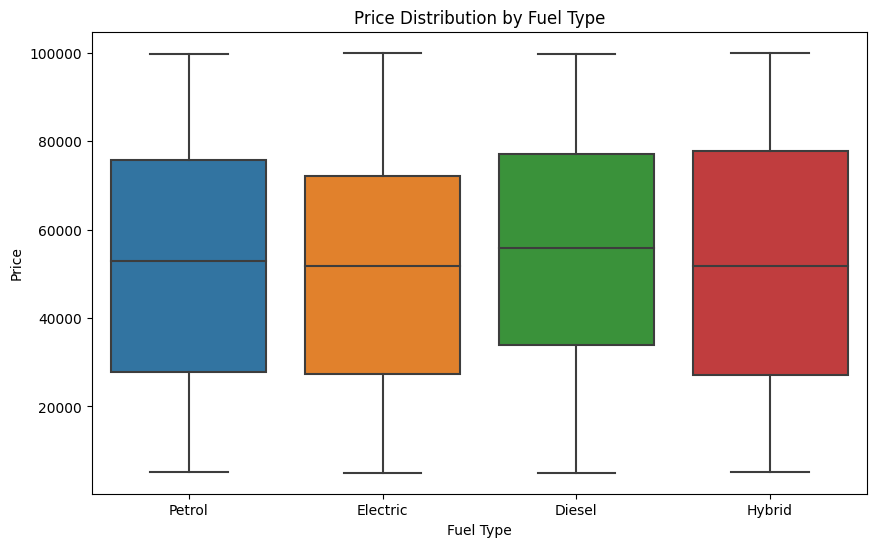

Fuel Type
Diesel      54996.997588
Hybrid      52547.394759
Petrol      51767.918016
Electric    51103.013534
Name: Price, dtype: Float64


In [10]:
# Boxplot: Fuel Type vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel Type', y='Price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.show()

# Mean price by fuel type
fuel_price = df.groupby('Fuel Type')['Price'].mean().sort_values(ascending=False)
print(fuel_price)

Transmission
Automatic    52691.684639
Manual        52589.11945
Name: Price, dtype: Float64


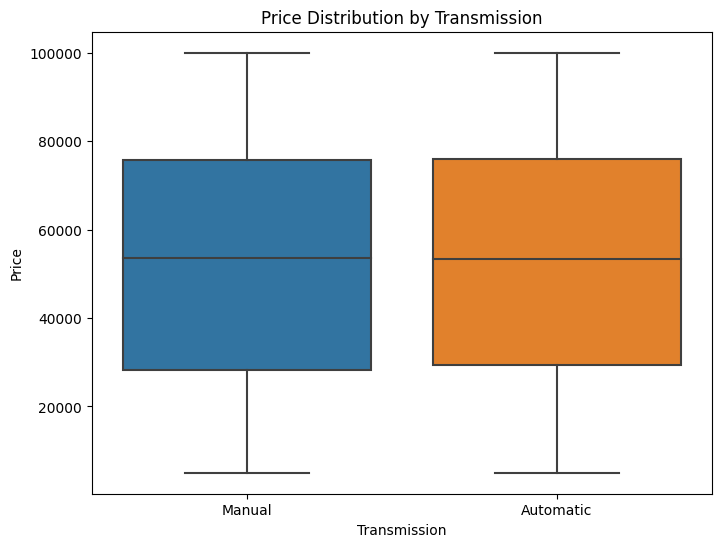

In [11]:
# Mean price by transmission
trans_price = df.groupby('Transmission')['Price'].mean()
print(trans_price)

# Boxplot: Transmission vs. Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price', data=df)
plt.title('Price Distribution by Transmission')
plt.show()

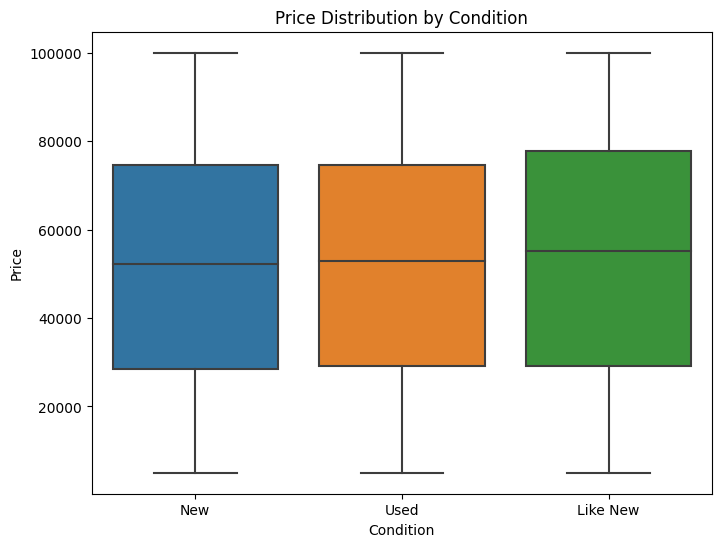

Condition
Like New    53518.746376
New         51904.509951
Used        52470.919076
Name: Price, dtype: Float64


In [13]:
# Boxplot: Condition vs. Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Condition', y='Price', data=df)
plt.title('Price Distribution by Condition')
plt.show()

# Mean price by condition
condition_price = df.groupby('Condition')['Price'].mean()
print(condition_price)

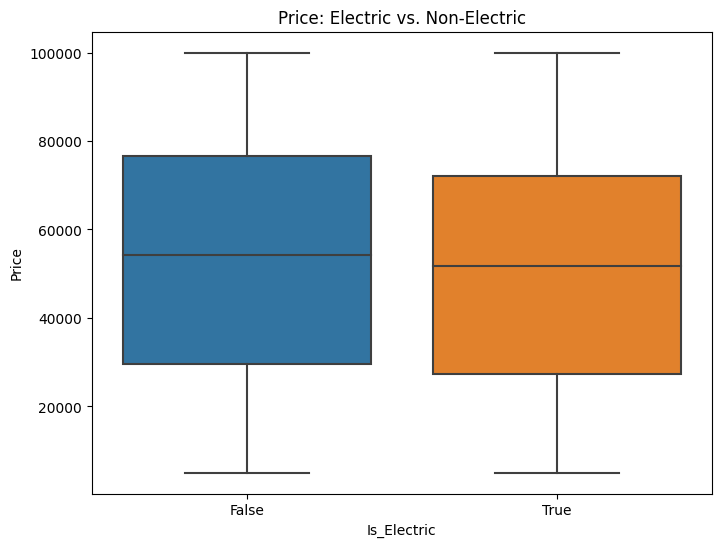

In [14]:
# Compare EV vs. non-EV prices
df['Is_Electric'] = df['Fuel Type'] == 'Electric'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_Electric', y='Price', data=df)
plt.title('Price: Electric vs. Non-Electric')
plt.show()

# Price Predictions and Modeling

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import joblib
import os

In [16]:
df = pd.read_csv('/kaggle/input/car-price-prediction/car_price_prediction_.csv')
df = df.convert_dtypes()

In [17]:
X = df.drop(['Price', 'Car ID'], axis=1)
y = df['Price']

In [18]:
categorical_cols = ['Brand', 'Model', 'Fuel Type', 'Transmission', 'Condition']
numerical_cols = ['Year', 'Engine Size', 'Mileage']

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])

In [21]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  

In [22]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')

In [23]:
models = {
    'Bagging': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', BaggingRegressor(estimator=RandomForestRegressor(n_estimators=10), n_estimators=10, random_state=42))
    ]),
    'AdaBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', AdaBoostRegressor(estimator=RandomForestRegressor(n_estimators=10), n_estimators=50, random_state=42))
    ]),
    'Stacking': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', StackingRegressor(
            estimators=[
                ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
                ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
                ('xgb', xgb.XGBRegressor(n_estimators=100, random_state=42))
            ],
            final_estimator=LinearRegression()
        ))
    ]),
    'Voting': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', VotingRegressor(
            estimators=[
                ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
                ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
                ('xgb', xgb.XGBRegressor(n_estimators=100, random_state=42))
            ]
        ))
    ])
}

In [24]:
os.makedirs('models', exist_ok=True)

In [25]:
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Save model
    joblib.dump(model, f'models/{name}_model.pkl')
    
    # Evaluate on validation set
    y_val_pred = model.predict(X_val)
    val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Evaluate on test set
    y_test_pred = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results[name] = {
        'Val RMSE': val_rmse,
        'Val R²': val_r2,
        'Test RMSE': test_rmse,
        'Test R²': test_r2
    }
    print(f"{name} - Val RMSE: {val_rmse:.2f}, Val R²: {val_r2:.2f}, Test RMSE: {test_rmse:.2f}, Test R²: {test_r2:.2f}")

Bagging - Val RMSE: 28521.92, Val R²: -0.06, Test RMSE: 28209.91, Test R²: -0.05
AdaBoost - Val RMSE: 28754.27, Val R²: -0.08, Test RMSE: 28539.63, Test R²: -0.08
Stacking - Val RMSE: 27827.52, Val R²: -0.01, Test RMSE: 27593.22, Test R²: -0.01
Voting - Val RMSE: 29230.39, Val R²: -0.11, Test RMSE: 28889.00, Test R²: -0.10


In [26]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
              Val RMSE    Val R²     Test RMSE   Test R²
Bagging   28521.919580 -0.060337  28209.905848 -0.050485
AdaBoost  28754.272458 -0.077683  28539.634990 -0.075186
Stacking  27827.518495 -0.009335  27593.215417 -0.005059
Voting    29230.386715 -0.113667  28888.998041 -0.101671


# Inference

In [27]:
import pandas as pd
import joblib

# Load a model
def load_model(model_name):
    return joblib.load(f'/kaggle/working/models/{model_name}_model.pkl')

# Predict price for new data
def predict_price(model, data):
    return model.predict(data)

# Example usage
if __name__ == '__main__':
    # Example new data (must match dataset structure)
    new_data = pd.DataFrame({
        'Brand': ['Tesla'],
        'Model': ['Model X'],
        'Year': [2016],
        'Engine Size': [2.3],
        'Fuel Type': ['Petrol'],
        'Transmission': ['Manual'],
        'Mileage': [114832],
        'Condition': ['New']
    })
    
    # Load and predict with each model
    model_names = ['Bagging', 'AdaBoost', 'Stacking', 'Voting']
    for name in model_names:
        model = load_model(name)
        prediction = predict_price(model, new_data)
        print(f"{name} Prediction: ${prediction[0]:.2f}")

Bagging Prediction: $54634.75
AdaBoost Prediction: $46167.13
Stacking Prediction: $52039.24
Voting Prediction: $56117.68
